In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix, precision_score, recall_score, classification_report, ConfusionMatrixDisplay

In [2]:
data = pd.read_csv('vertebral_column.csv')
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis,class
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB
1,39.06,10.06,25.02,29.00,114.41,4.56,AB
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB
3,69.30,24.65,44.31,44.64,101.87,11.21,AB
4,49.71,9.65,28.32,40.06,108.17,7.92,AB
...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO
308,45.25,8.69,41.58,36.56,118.55,0.21,NO


In [3]:
data['class'].value_counts()

class
AB    210
NO    100
Name: count, dtype: int64

In [4]:
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data.iloc[:, 0:6])
pd.DataFrame(data_scaled, columns = data.columns[0:6])

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis
0,0.147227,0.501111,-0.665128,-0.184602,-1.447831,-0.707946
1,-1.245707,-0.748891,-1.452763,-1.041250,-0.264028,-0.579673
2,0.484273,0.468085,-0.099370,0.272823,-0.897295,-0.795417
3,0.511586,0.711280,-0.411401,0.125820,-1.207159,-0.402332
4,-0.626819,-0.789923,-1.274614,-0.215943,-0.733337,-0.490069
...,...,...,...,...,...,...
305,-0.732001,-0.392605,-0.860012,-0.646505,-0.035390,-0.814618
306,-0.381007,0.317965,-1.226028,-0.726350,-0.267036,-0.712480
307,0.055410,0.515123,-0.310989,-0.313696,0.582835,-0.773549
308,-0.885997,-0.886000,-0.558778,-0.477116,0.047341,-0.695679


In [5]:
kmeans = KMeans(n_clusters = 2, n_init = 10, max_iter = 100)
kmeans.fit(data_scaled)

KMeans(max_iter=100, n_clusters=2, n_init=10)

In [6]:
centers = pd.DataFrame(kmeans.cluster_centers_,columns=data.columns[0:6])
centers

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis
0,-0.664326,-0.41756,-0.60845,-0.541704,0.185506,-0.500431
1,0.970127,0.60977,0.88853,0.791059,-0.270898,0.730788


In [7]:
centers_orig = pd.DataFrame(scaler.inverse_transform(kmeans.cluster_centers_), columns = data.columns[0:6])
centers_orig

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis
0,49.064565,13.370652,40.659891,35.694457,120.387065,7.531467
1,77.190714,23.635714,68.389683,53.554921,114.318651,53.700000


In [10]:
data['cluster'] = kmeans.labels_

In [13]:
data['class_true'] = np.where(data['class'] == 'AB', 1, 0)

In [14]:
data

,pelvic_incidence,pelvic_tilt,lumbar_lordosis_angle,sacral_slope,pelvic_radius,grade_spondylolisthesis,class,cluster,class_true
0,63.03,22.55,39.61,40.48,98.67,-0.25,AB,0,1
1,39.06,10.06,25.02,29.00,114.41,4.56,AB,0,1
2,68.83,22.22,50.09,46.61,105.99,-3.53,AB,1,1
3,69.30,24.65,44.31,44.64,101.87,11.21,AB,1,1
4,49.71,9.65,28.32,40.06,108.17,7.92,AB,0,1
...,...,...,...,...,...,...,...,...,...
305,47.90,13.62,36.00,34.29,117.45,-4.25,NO,0,0
306,53.94,20.72,29.22,33.22,114.37,-0.42,NO,0,0
307,61.45,22.69,46.17,38.75,125.67,-2.71,NO,0,0
308,45.25,8.69,41.58,36.56,118.55,0.21,NO,0,0


In [17]:
cf = confusion_matrix(data['class_true'], data['cluster'])

cf_df = pd.DataFrame(
    cf,
    index=[f'Class_{i}' for i in range(cf.shape[0])],
    columns=[f'Cluster_{j}' for j in range(cf.shape[1])]
)

cf_df

,Cluster_0,Cluster_1
Class_0,90,10
Class_1,94,116


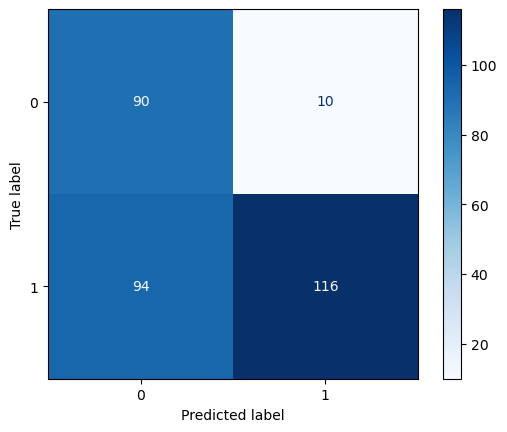

In [18]:
ConfusionMatrixDisplay(cf, display_labels = [0, 1]).plot(cmap = 'Blues')
plt.show()


In [19]:
print(classification_report(data['class_true'], data['cluster']))

              precision    recall  f1-score   support

           0       0.49      0.90      0.63       100
           1       0.92      0.55      0.69       210

    accuracy                           0.66       310
   macro avg       0.70      0.73      0.66       310
weighted avg       0.78      0.66      0.67       310

